# 作业五
使用Python实现Girvan-Newman社团检测算法，

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def Graph_Generate(file):
    edges=pd.read_csv(file)  
    return nx.from_pandas_edgelist(edges,source='source',target='target',edge_attr='value' )

## 建图
### 利用csv的数据建图，图为无向有权边图，可以从图中看到部分节点之间距离较近。

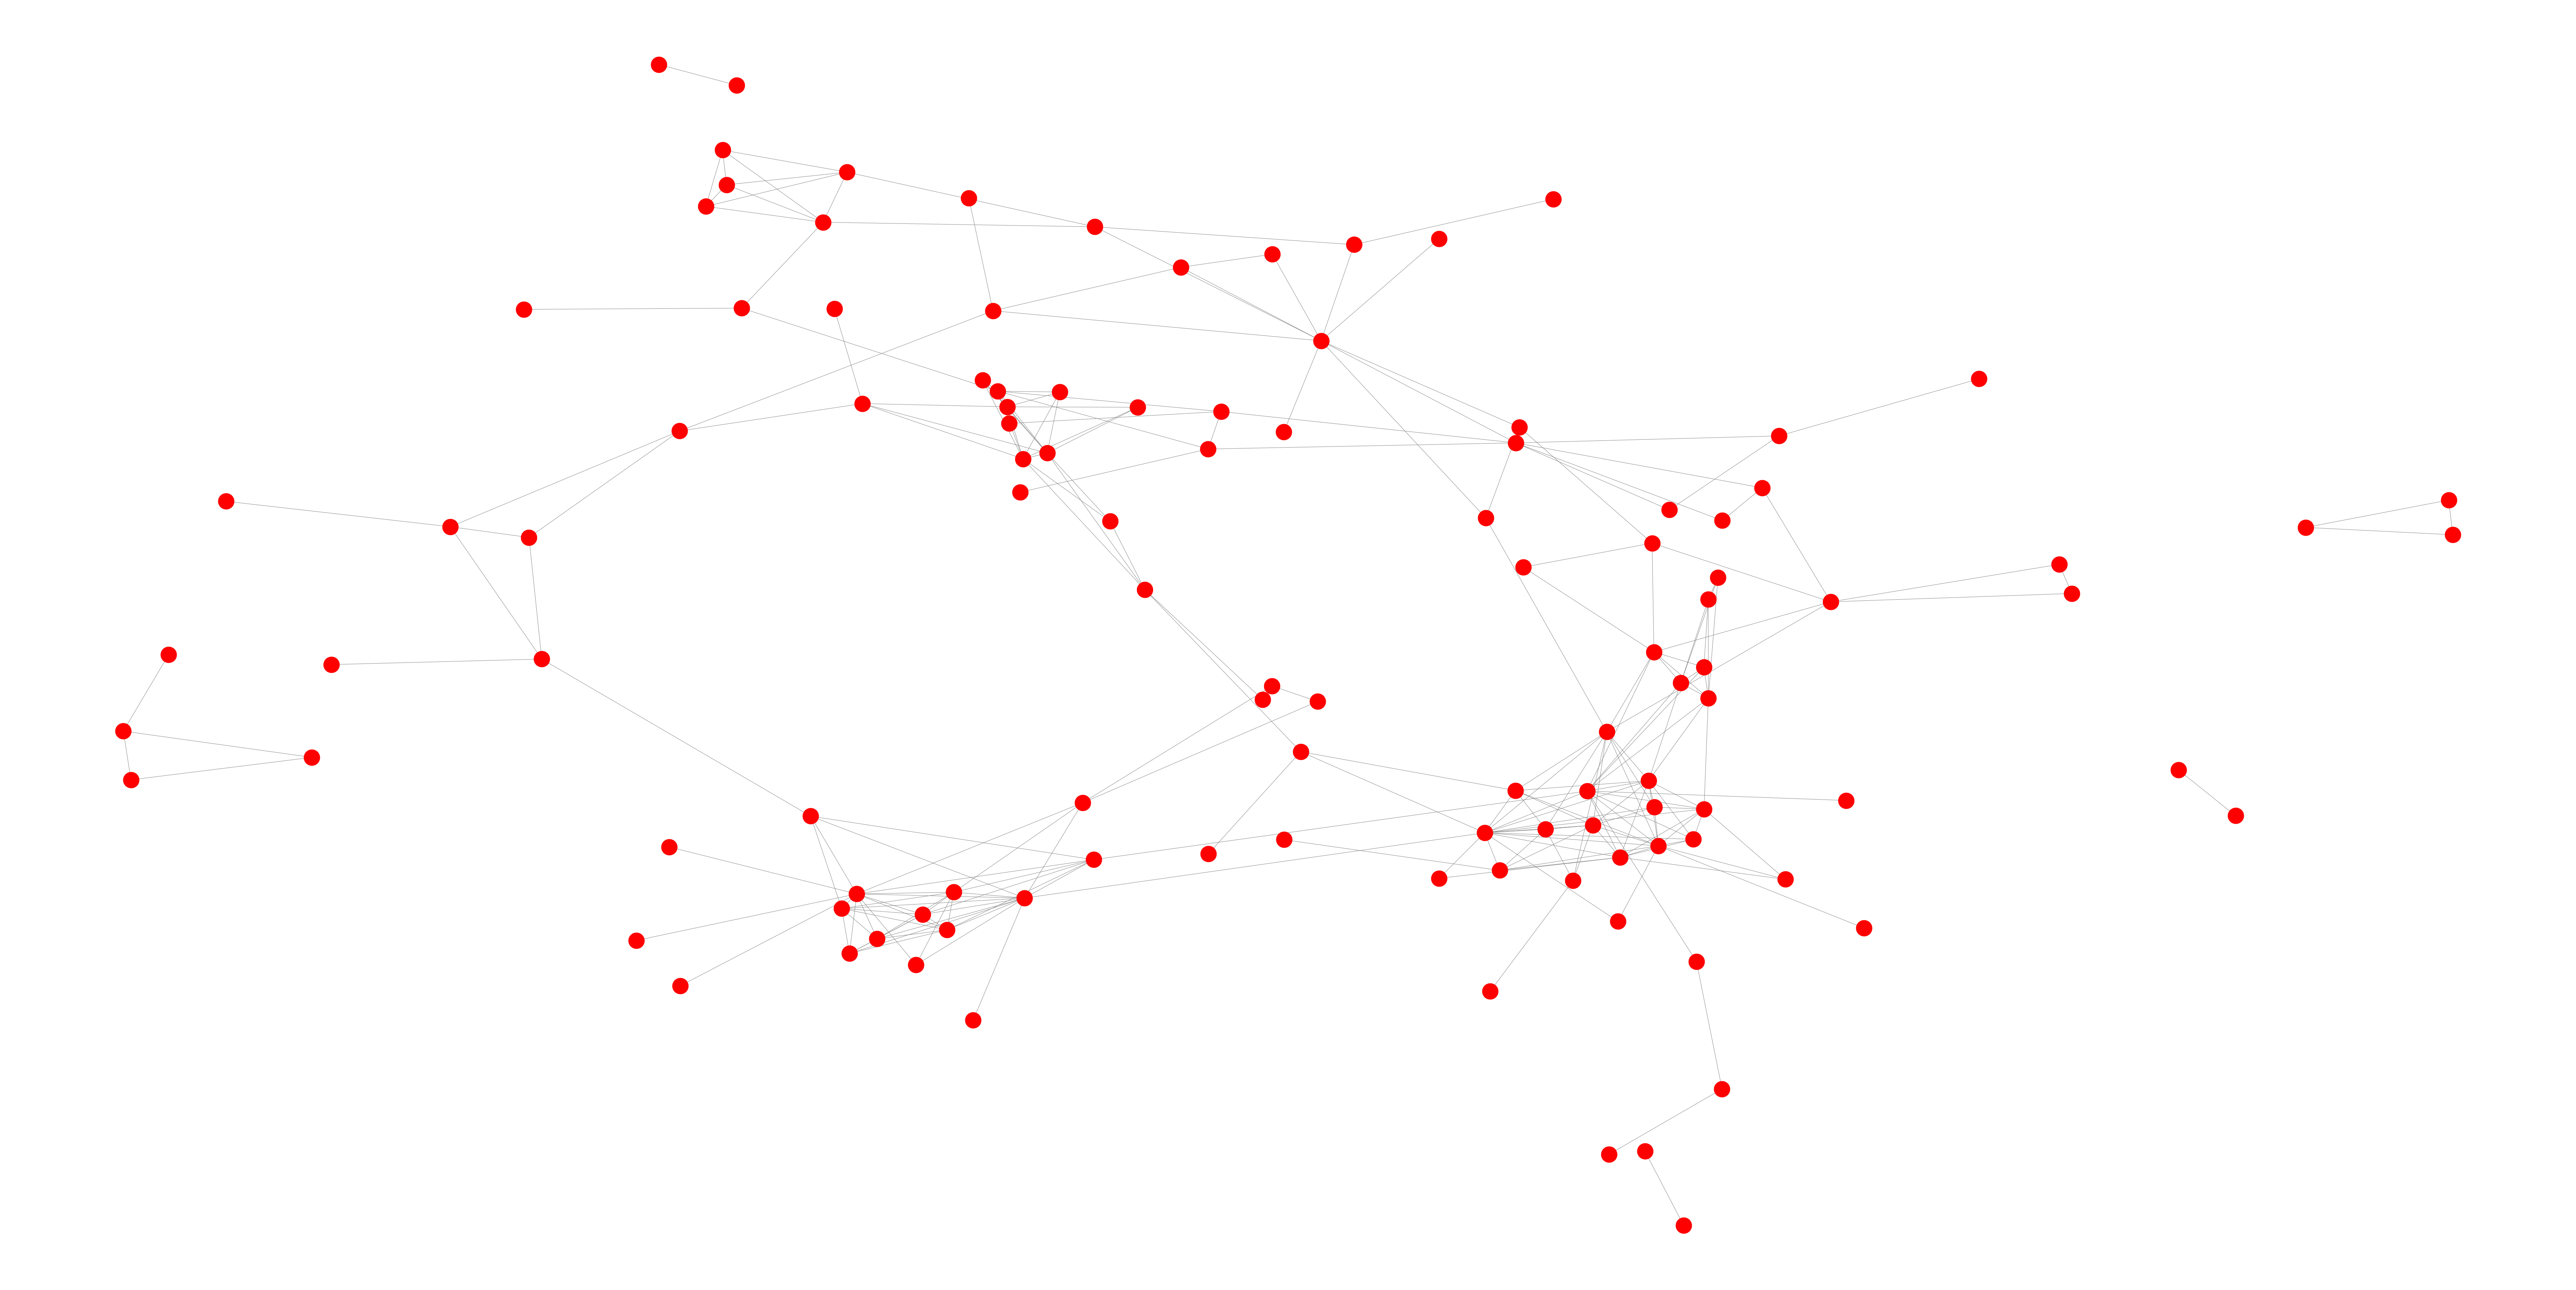

In [3]:
G = Graph_Generate('stack_network_links.csv')
plt.figure(figsize=(100,50))  
nx.draw(G,with_labels=False,  
        edge_color='grey',  
        node_color='red',  
        node_size = 2000,  
        pos=nx.spring_layout(G,k=0.2)) 

## 算法实现

### 每次在计算EBC分数后，利用RemoveEdge函数去掉分数最高的边，重复此过程，直到不是连通图为止。

In [4]:
def RemoveEdge(graph):
    dic = nx.edge_betweenness_centrality(graph)
    dic = sorted(dic.items(),key = lambda i:i[1], reverse = True)
    edge = dic[0][0]
    return edge

In [5]:
def GirvanNewman(graph):
    con = nx.connected_components(graph)
    cnt = nx.number_connected_components(graph)
    while(cnt == 1):
        graph.remove_edge(RemoveEdge(graph)[0], RemoveEdge(graph)[1])
        con = nx.connected_components(graph)
        cnt = nx.number_connected_components(graph)
    return con

In [6]:
ans = GirvanNewman(G.copy())
node_groups = [list(i) for i in ans]
print("节点分为了{}个类。".format(len(node_groups)))

节点分为了6个类。


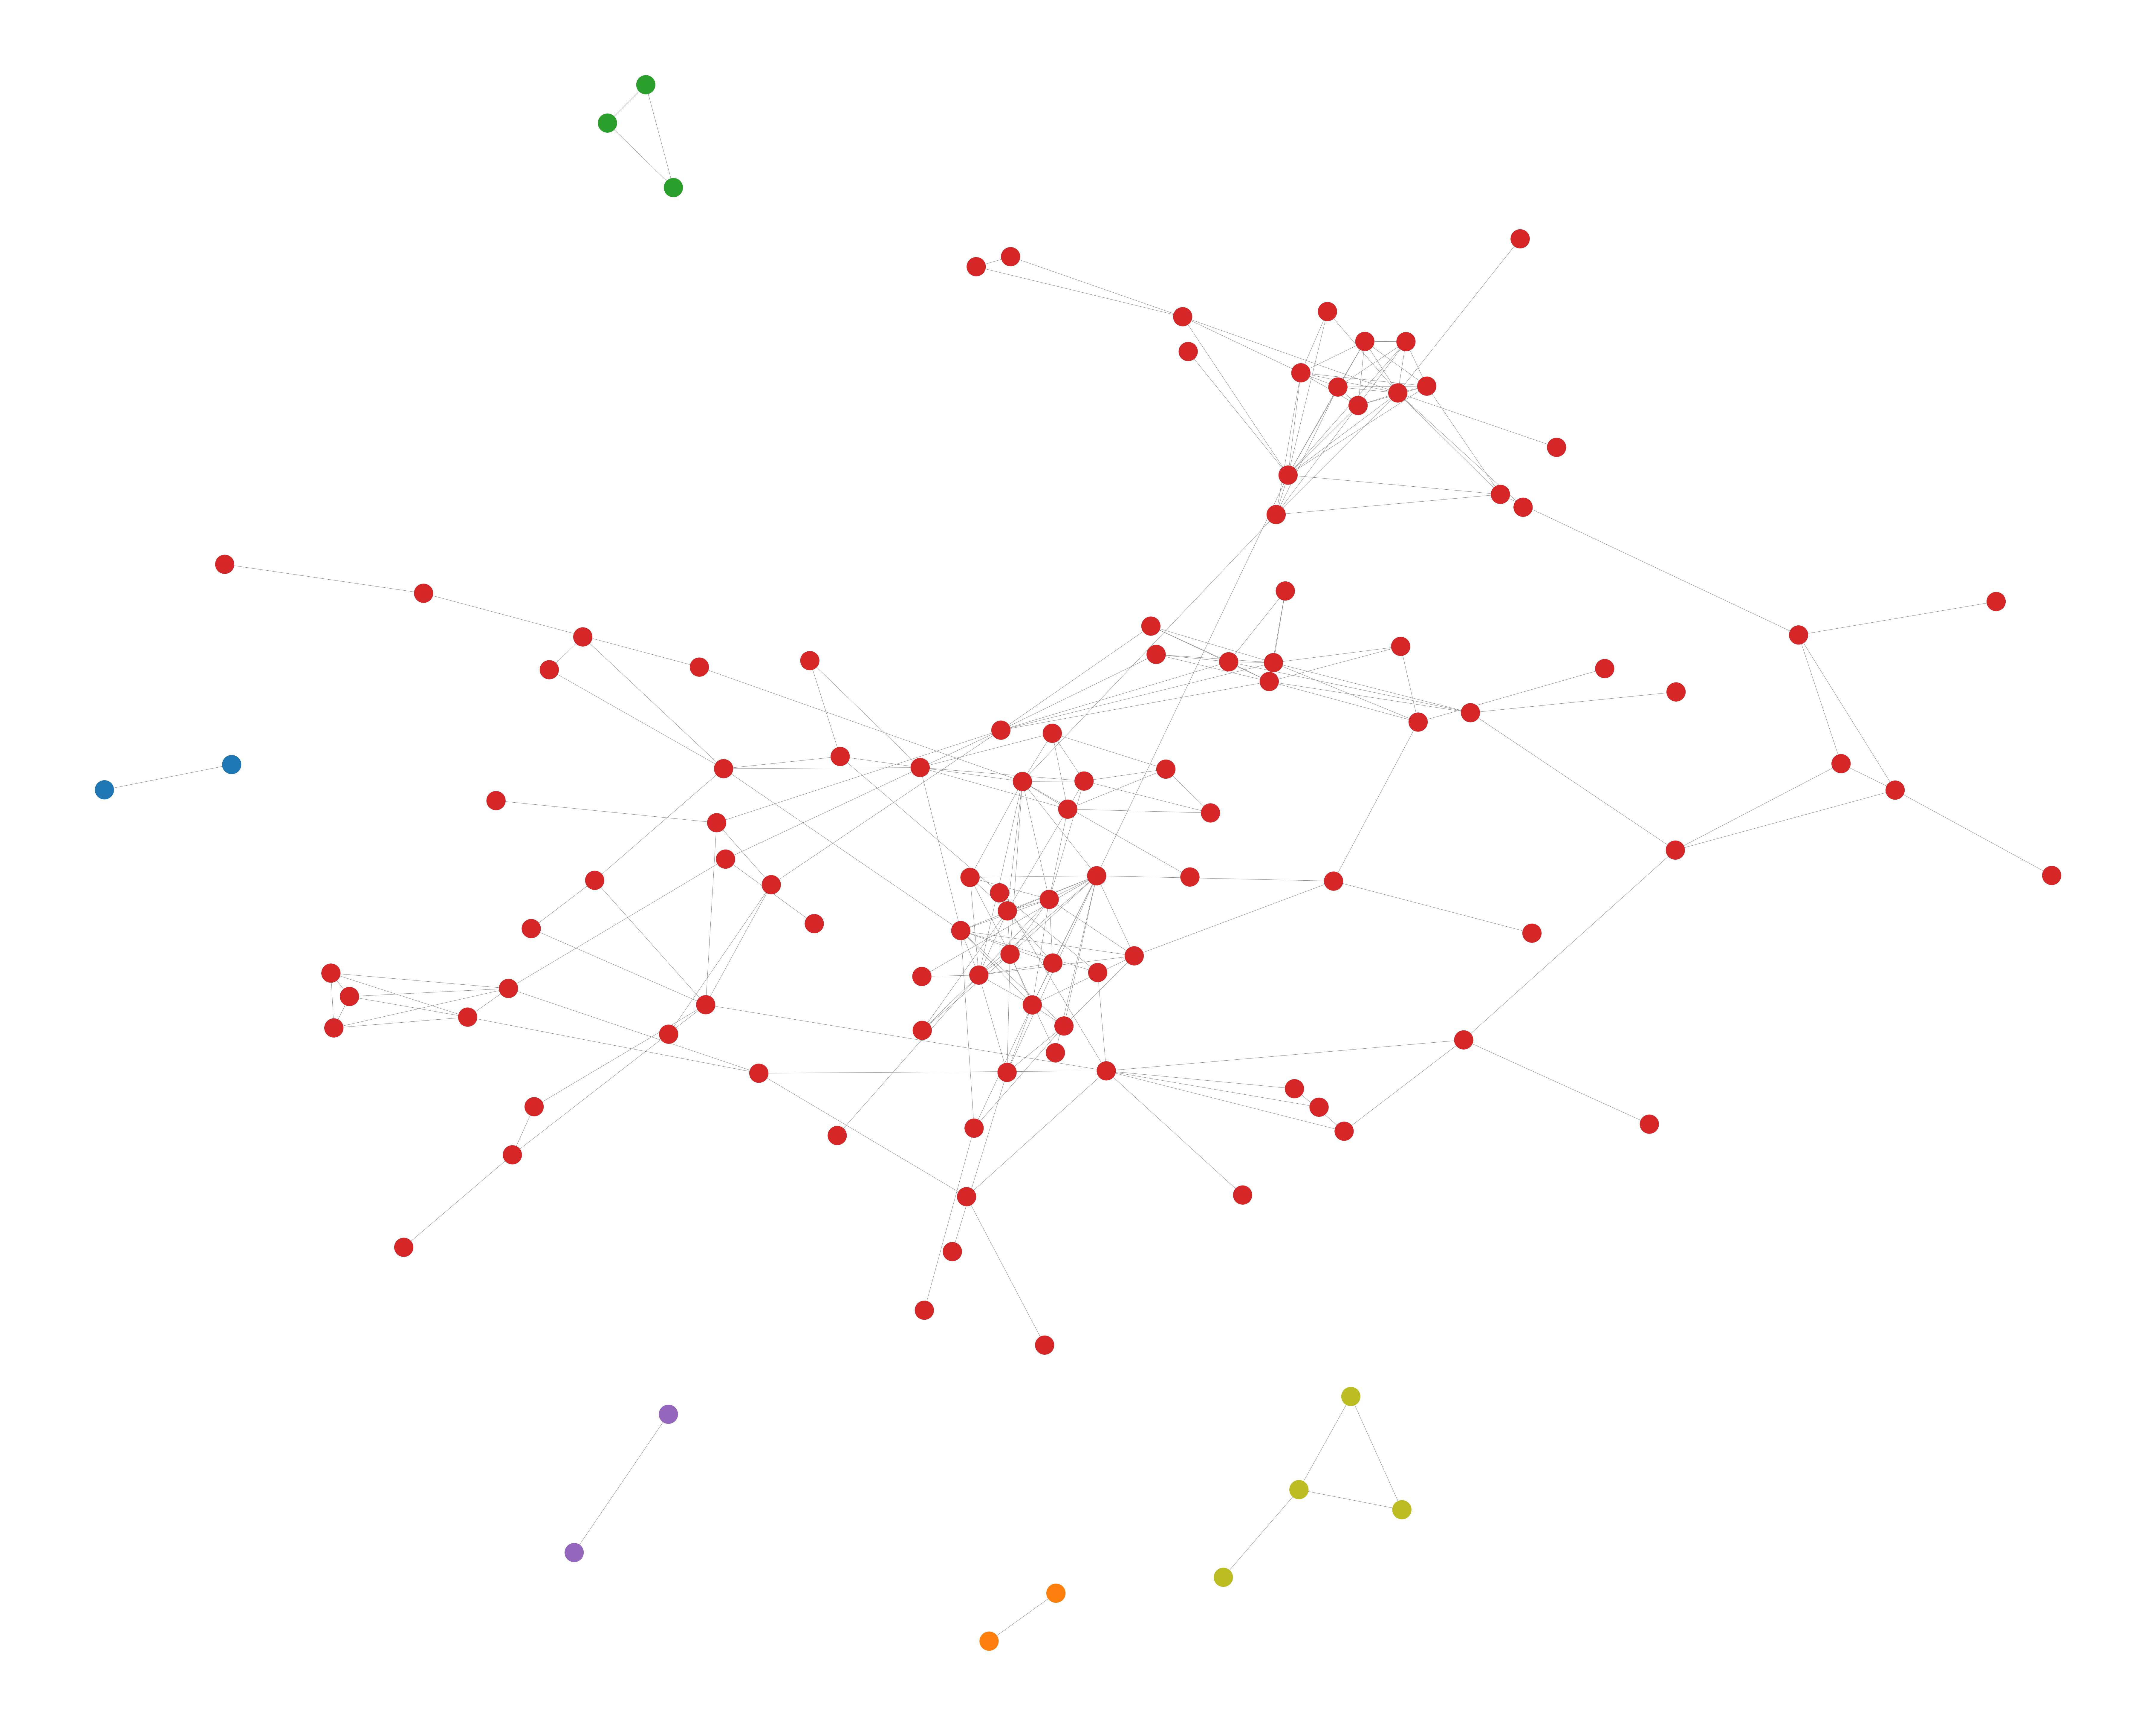

In [7]:
node_dist_to_color = {
    1: "tab:red",
    2: "tab:orange",
    3: "tab:olive",
    4: "tab:green",
    5: "tab:blue",
    6: "tab:purple",
}
color_map = [] 
for nod  in G:
    for i in range(6):
        if nod in node_groups[i]:
            color_map.append(node_dist_to_color[i+1])

plt.figure(figsize=(100,80))  
nx.draw(G,with_labels=False,  
        edge_color='grey',  
        node_size = 4000,  
        node_color=color_map,
        pos=nx.spring_layout(G,k=0.2)) 
plt.show()

## 结论
### 结果如上图所示，可以看到算法的效果非常好，根据节点之间的连接与距离关系，算法将图节点分割为了多个community，每个community中的节点紧密相连。